<a href="https://colab.research.google.com/github/ayhem18/My_Kaggle_Repo/blob/master/Working_on_datasets/Sign_language_MNIST_dataset/Sign_language_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Overview
This notebook is classifier is a sign language classifier using Deep Learning Techniques implemented in the Tensorflow framework.
The training as well as testing datasets can be found through the data science platform [Kaggle Platform](https://www.kaggle.com/datasets/datamunge/sign-language-mnist) 

### Imports and loading data 

In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# set the seeds for both numpy as tensorflow
tf.random.set_seed(11)
np.random.seed(31) 

In [ ]:
main_directory = os.path.join("sample_data", "datasets") # the root directory for the data (Please change it accordingly)

### Setting the directories 
The dataset is provided in a zip file. The datatsets are extracted. I decided to automate the process with Python in the few next cells.

In [ ]:
import zipfile
initial_archive_name = "archive.zip"
archive_zip = os.path.join(main_directory, initial_archive_name)
if os.path.exists(archive_zip):
    zip_ref = zipfile.ZipFile(archive_zip, 'r')
    zip_ref.extractall(main_directory)
    zip_ref.close()

In [ ]:
print(os.listdir(main_directory))   
TRAINING_DIR_NAME = "sign_mnist_train"
TESTING_DIR_NAME = "sign_mnist_test"

['sign_mnist_test', '.ipynb_checkpoints', 'sign_mnist_train']


### Working with the training files
After removing the unnecessary directories, it is time to understand the data provided and perform the necessary data preprocessing before creating any model.

In [ ]:
TRAIN_DIR = os.path.join(main_directory, TRAINING_DIR_NAME)
TEST_DIR = os.path.join(main_directory, TESTING_DIR_NAME)

In [ ]:
# print the content of the training diretory
print(os.listdir(TRAIN_DIR))
print(os.listdir(TEST_DIR))

['sign_mnist_train.csv']
['sign_mnist_test.csv']


In [ ]:
train_file_name = "sign_mnist_train.csv"
test_file_name = "sign_mnist_test.csv"

In [ ]:
## remove unnecessary files in both directories
from shutil import rmtree
train_dir = os.listdir(TRAIN_DIR)
test_dir = os.listdir(TEST_DIR)
for f in train_dir:
  if f != train_file_name:
    try:
      os.remove(os.path.join(TRAIN_DIR, f))
    except:
      rmtree(os.path.join(TRAIN_DIR, f))
for f in test_dir:
  if f != test_file_name:
    try:
      os.remove(os.path.join(TEST_DIR, f))
    except:
      rmtree(os.path.join(TEST_DIR, f))
      

In [ ]:
## the data is stored in a csv which requires the use of the pandas library
import pandas as pd
train_file = os.path.join(TRAIN_DIR, os.listdir(TRAIN_DIR)[0])
train_df_org = pd.read_csv(train_file) 

test_file = os.path.join(TEST_DIR, os.listdir(TEST_DIR)[0])
test_df_org = pd.read_csv(test_file)

In [ ]:
print(train_df_org.shape)
# so we can see we have 785 columns and 27455 training samples
print(train_df_org.columns)
# as we can see the first picture is the label while the rest represent numerical values of the individual pixels

new_cols_name = {}
new_cols_name['label'] = "y"
for i in range(1, 785):
    new_cols_name["pixel{}".format(str(i))] = str(i)
train_df = train_df_org.rename(columns=new_cols_name)
test_df = test_df_org.rename(columns=new_cols_name)

(27455, 785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
y_train = train_df["y"]
train_df.drop("y", inplace=True,axis=1)

y_test = test_df["y"]
test_df.drop("y", inplace=True,axis=1)

In [ ]:
img_size = (28, 28)

### Visualization 
Visualizing a random sample of the images used in the dataset, helps building a better intuitive understanding of the data.

In [ ]:
# according to the data documentation, the images are meant to be 28 * 28 gray scale images
pixel_range = 255.0
def transform_row_to_pic(df, index):
    return df.iloc[i, :].values.reshape(img_size) / pixel_range

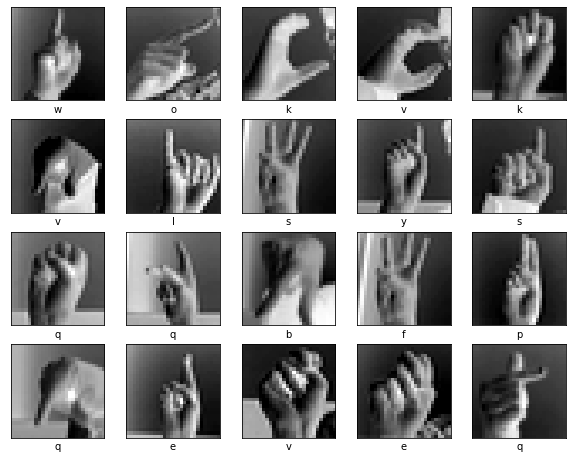

In [ ]:
import string
import random
sample = 20
## Visualize a random smaple of the training dataset 

plt.figure(figsize=(10, 10))
for i in range(sample):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.randint(0, len(train_df))
    plt.imshow(transform_row_to_pic(train_df, index), cmap=plt.cm.binary)
    plt.xlabel(string.ascii_letters[y_train[index]]) # the numerical label associated with the hand sign is the letter's order in the alphabet

plt.show()

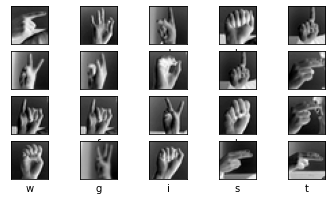

In [ ]:
# visualize a random sample of the test dataset.
for i in range(sample):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.randint(0, len(test_df))
    plt.imshow(transform_row_to_pic(test_df, index), cmap=plt.cm.binary)
    plt.xlabel(string.ascii_letters[(y_test[index])]) # the numerical label associated with the hand sign is the letter's order in the alphabet

plt.show()

### Reshaping, normalization and CV
The data is meant to represent (28 * 28) grey scale images as par the documentation. Additionally, it is recommended to normalize the data: (map it to the range [0, 1] instead of [0, 255]) as it both accelerates the training and potentially improves the performance.  
A Cross Validation is needed for hyperparameters' tuning.

In [ ]:
## first convert the data from dataframes to numpy arrays
X_train = train_df.values / pixel_range
Y_train = y_train.values

X_test = test_df.values / pixel_range
Y_test = y_test.values

print(X_train.shape)
print(X_test.shape)


(27455, 784)
(7172, 784)


In [ ]:
## create the cross-validation out of the training dataset as the testing dataset is not too large 
from sklearn.model_selection import train_test_split
val_size = 0.2
random_state = 11
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=val_size, random_state=random_state) 

In [ ]:
# reshaping the data to feed it to the model
X_train = X_train.reshape(-1, 28, 28,1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# DL models imports
import tensorflow as tf
import tensorflow.keras.layers as tfl

### Data Augmentation
The training data provided is relatively large. However, we might try to augment the data to obtain more diversity and possibly achieve  
better performance.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(11)
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate the image with an angle up to 10 degrees
        zoom_range = 0.15, # randomly zoom up to 15% 
        width_shift_range=0.15,  # randomly shift the image horizontally up to 15% of the image total width 
        height_shift_range=0.15,  # randomly shift the image vertifcally up to 15% of the image total height
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
# the flipping options are set to true as certain images are close to being symmetric, which might lead to misleading results
# fit the generator to the training dataset
datagen.fit(X_train)

## Models
In this part of the notebook, I will experiment with different models starting with Plain Neural Networks to CNN based on transfer learning.

### Plain Neural Networks 
So the first approach to solve this problem is to use Plain neural networks that uses all of the pixels in each picture. The main goal is to achieve as high of a performance as possible with each available model.

In [ ]:
# build the model: 
#input_shape = (1, 784)
def dnn_model(input_shape=(28, 28, 1)):
  tf.random.set_seed(11)
  first_model = tf.keras.Sequential([
      tfl.Flatten(input_shape=input_shape), 
      tfl.Dense(1024, activation='relu'), 
      tfl.Dense(1024, activation='relu'), 
      tfl.BatchNormalization(), 
      tfl.Dense(512, activation='relu'), 
      tfl.Dense(512, activation='relu'),
      tfl.BatchNormalization(),
      tfl.Dense(256, activation='relu'), 
      tfl.Dense(128, activation='relu'),
      tfl.BatchNormalization(),
      tfl.Dense(64, activation='relu'),
      tfl.Dense(32, activation='relu'), 
      tfl.BatchNormalization(),  
      tfl.Dense(26, activation='softmax')] # output layer
      ) 
  return first_model


#### DNN without augmented images
In this subsection, I train DNN model on original training dataset with and without the augmented images.

In [ ]:
EPOCHS = 10
first_model = dnn_model(input_shape=(28, 28, 1))
first_model.compile(optimizer='adam', 
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

history_aug = first_model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_val, Y_val))

Epoch 1/10
687/687 [==============================] - 29s 41ms/step - loss: 2.0772 - accuracy: 0.3678 - val_loss: 5.8438 - val_accuracy: 0.1025
Epoch 2/10
687/687 [==============================] - 27s 39ms/step - loss: 0.8709 - accuracy: 0.7159 - val_loss: 3.1150 - val_accuracy: 0.3123
Epoch 3/10
687/687 [==============================] - 28s 41ms/step - loss: 0.4541 - accuracy: 0.8563 - val_loss: 1.2160 - val_accuracy: 0.6414
Epoch 4/10
687/687 [==============================] - 28s 41ms/step - loss: 0.2970 - accuracy: 0.9031 - val_loss: 0.6071 - val_accuracy: 0.8040
Epoch 5/10
687/687 [==============================] - 27s 40ms/step - loss: 0.1891 - accuracy: 0.9388 - val_loss: 1.7811 - val_accuracy: 0.5895
Epoch 6/10
687/687 [==============================] - 27s 39ms/step - loss: 0.1562 - accuracy: 0.9501 - val_loss: 0.3554 - val_accuracy: 0.8864
Epoch 7/10
687/687 [==============================] - 27s 40ms/step - loss: 0.1235 - accuracy: 0.9604 - val_loss: 0.7820 - val_accuracy:

In [ ]:
print(first_model.evaluate(X_test, Y_test))

225/225 [==============================] - 2s 9ms/step - loss: 1.5214 - accuracy: 0.6956
[1.5214080810546875, 0.6956218481063843]


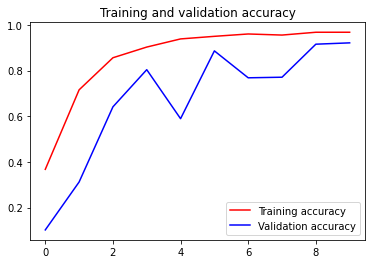

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#### DNN with augmented images
Let's inspect the effect of adding augmented images to the training dataset.

In [ ]:
first_model_aug = dnn_model()
first_model_aug.compile(optimizer='adam', 
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

NUM_BATCHES = 200
history_aug = first_model_aug.fit(datagen.flow(X_train,Y_train, batch_size = len(X_train) // 200),epochs = EPOCHS , validation_data = (X_val, Y_val))


Epoch 1/10
202/202 [==============================] - 20s 90ms/step - loss: 2.9093 - accuracy: 0.1573 - val_loss: 5.0960 - val_accuracy: 0.0523
Epoch 2/10
202/202 [==============================] - 18s 89ms/step - loss: 2.1668 - accuracy: 0.3271 - val_loss: 10.5909 - val_accuracy: 0.0546
Epoch 3/10
202/202 [==============================] - 18s 89ms/step - loss: 1.6918 - accuracy: 0.4561 - val_loss: 6.2672 - val_accuracy: 0.1071
Epoch 4/10
202/202 [==============================] - 18s 88ms/step - loss: 1.3456 - accuracy: 0.5569 - val_loss: 3.8363 - val_accuracy: 0.1670
Epoch 5/10
202/202 [==============================] - 18s 88ms/step - loss: 1.1080 - accuracy: 0.6287 - val_loss: 2.7368 - val_accuracy: 0.3467
Epoch 6/10
202/202 [==============================] - 18s 88ms/step - loss: 0.9194 - accuracy: 0.6929 - val_loss: 1.5473 - val_accuracy: 0.5194
Epoch 7/10
202/202 [==============================] - 19s 94ms/step - loss: 0.8215 - accuracy: 0.7253 - val_loss: 1.2546 - val_accuracy

In [ ]:
print(first_model_aug.evaluate(X_test, Y_test))

225/225 [==============================] - 2s 9ms/step - loss: 1.5344 - accuracy: 0.5545
[1.5344457626342773, 0.5545175671577454]


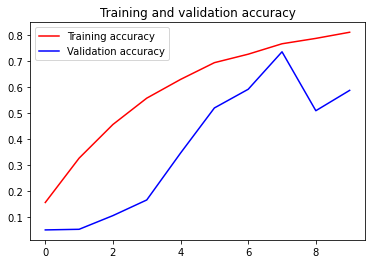

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Plain Neural networks are not the most efficient models for computer vision tasks. 
### Convolutional Neural Network
Convolutional neural network represent a more powerful tool as they extract features from the images using filters resulting in a significant improvement in performance while mainting a relatively low number of parameters.

In [ ]:
def cnn_model(num_classes, input_shape=(28, 28, 1)):
    # set the seed to ensure reproducible results
    tf.random.set_seed(11)
    # define the input
    inputs = tf.keras.Input(shape=input_shape)
    # relu activation is used extensively:
    relu = tfl.ReLU()
    # 2D convolutional layer
    f1 = 32
    size1  = (3, 3)
    conv1 = tfl.Conv2D(filters=f1, kernel_size=size1, strides=(1, 1), padding='same')
    
    pool1 = tfl.MaxPool2D((3, 3))
    f2 = 64
    conv2 = tfl.Conv2D(filters=f2, kernel_size=size1, strides=(1, 1), padding='same')
    
    size2 = (3, 3)
    f3 = 128
    conv3 = tfl.Conv2D(filters=f3, kernel_size=size2, strides=(2, 2), padding='same')

    f4 = 128
    conv4 = tfl.Conv2D(filters=f4, kernel_size=size2, strides=(1, 1), padding='same')

    pool2 = tfl.MaxPool2D((2, 2))

    # the neural network should be as follows:
    # con1 * 2 -> conv2 *2 -> pool1 -> conv3 * 2 -> conv4 * 2 -> pool2 -> fully connected1 -> fullyconnected2 -> softmax
    
    #con1 * 2
    x = conv1(inputs)
    x = relu(x)
    x = conv1(inputs)
    x = relu(x)
    # con2 * 2
    x = conv2(inputs)
    x = relu(x)
    
    x = conv2(inputs)
    x = relu(x)
    # normalizing on the channel axis
    x = tfl.BatchNormalization(axis=-1)(x)
    x = pool1(x)
    
    x = conv3(x)
    x = relu(x)

    x = conv4(x)
    x = relu(x)

    # normalizing on the channel axis
    x = tfl.BatchNormalization(axis=-1)(x)
    x = pool2(x)

    flatten = tfl.Flatten() 
    fc1 = tfl.Dense(128, activation='relu')
    fc2 = tfl.Dense(512, activation='relu')
    if num_classes == 2:
        fc3 = tfl.Dense(1 , activation='sigmoid')
    else:
        fc3 = tfl.Dense(num_classes, activation='softmax')
    x = flatten(x)
    x = fc1(x)
    x = fc2(x)
    outputs = fc3(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
cnnModel = cnn_model(input_shape=(28, 28, 1), num_classes=26)

cnnModel.compile(optimizer='adam', 
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
cnnModel.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_53 (Conv2D)             (None, 28, 28, 64)   640         ['input_14[0][0]']               
                                                                                                  
 re_lu_13 (ReLU)                multiple             0           ['conv2d_53[1][0]',              
                                                                  'conv2d_54[0][0]',              
                                                                  'conv2d_55[0][0]']              
                                                                                           

In [ ]:
num_batches = 20
cnnModel.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_val, Y_val))

Epoch 1/10
687/687 [==============================] - 57s 81ms/step - loss: 0.3143 - accuracy: 0.9060 - val_loss: 0.4646 - val_accuracy: 0.8702
Epoch 2/10
687/687 [==============================] - 55s 80ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 2.5621e-04 - val_accuracy: 1.0000
Epoch 3/10
687/687 [==============================] - 56s 82ms/step - loss: 1.3009e-04 - accuracy: 1.0000 - val_loss: 8.2749e-05 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 55s 80ms/step - loss: 4.6268e-05 - accuracy: 1.0000 - val_loss: 5.1402e-05 - val_accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 55s 80ms/step - loss: 2.7449e-05 - accuracy: 1.0000 - val_loss: 3.1315e-05 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 56s 81ms/step - loss: 1.5518e-05 - accuracy: 1.0000 - val_loss: 1.8802e-05 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 55s 79ms/step - loss: 1.0303e-05 - accuracy: 1

In [ ]:
# let's evaluate the model on the test dataset.
print(cnnModel.evaluate(X_test, Y_test))

225/225 [==============================] - 4s 18ms/step - loss: 0.2280 - accuracy: 0.9541
[0.22799110412597656, 0.9541271328926086]


Despite having a training accuracy of 100% and significantly low loss function, the test accuracy is still generally low which is a sign of overfitting. Let's introduce a number of tools to improve the test accurary:
* data augmentation
* dropout layers

### CNN with dropout layers

In [ ]:
def cnn_model_dropout(p1, p2, num_classes, input_shape=(28, 28, 1)):
    # set the see for reproducible results
    tf.random.set_seed(11)
    # define the input
    inputs = tf.keras.Input(shape=input_shape)
    # relu activation is used extensively:
    relu = tfl.ReLU()
    # 2D convolutional layer
    f1 = 32
    size1  = (3, 3)
    conv1 = tfl.Conv2D(filters=f1, kernel_size=size1, strides=(1, 1), padding='same')
    
    pool1 = tfl.MaxPool2D((3, 3))
    f2 = 64
    conv2 = tfl.Conv2D(filters=f2, kernel_size=size1, strides=(1, 1), padding='same')
    
    size2 = (3, 3)
    f3 = 128
    conv3 = tfl.Conv2D(filters=f3, kernel_size=size2, strides=(2, 2), padding='same')

    f4 = 128
    conv4 = tfl.Conv2D(filters=f4, kernel_size=size2, strides=(1, 1), padding='same')

    pool2 = tfl.MaxPool2D((2, 2))

    # the neural network should be as follows:
    # con1 * 2 -> conv2 *2 -> pool1 -> conv3 * 2 -> conv4 * 2 -> pool2 -> fully connected1 -> fullyconnected2 -> softmax
    
    #con1 * 2
    x = conv1(inputs)
    x = relu(x)
    x = conv1(inputs)
    x = relu(x)
    # con2 * 2
    x = conv2(inputs)
    x = relu(x)
    
    x = conv2(inputs)
    x = relu(x)
    # normalizing on the channel axis
    x = tfl.BatchNormalization(axis=-1)(x)
    x = pool1(x)
    
    x = conv3(x)
    x = relu(x)

    x = conv4(x)
    x = relu(x)

    # normalizing on the channel axis
    x = tfl.BatchNormalization(axis=-1)(x)
    x = pool2(x)

    flatten = tfl.Flatten() 
    fc1 = tfl.Dense(512, activation='relu')
    # add a dropout layer with a dropping rate of maximum 0.5
    d1 = tfl.Dropout(min(0.5, p1))
    fc2 = tfl.Dense(512, activation='relu')
    d2 = tfl.Dropout(min(0.5, p2))
    fc = tfl.Dense(1024)
    
    if num_classes == 2:
        fc3 = tfl.Dense(1 , activation='sigmoid')
    else:
        fc3 = tfl.Dense(num_classes, activation='softmax')
    x = flatten(x)
    x = fc1(x)
    x = d1(x)
    x = fc2(x)
    x = d2(x)
    outputs = fc3(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


### Hyperparameter Tuning
As combatting overfitting introduces additional hyperparameters, some tuning reveals necessary. I will consider a grid search over a space of hyparameters including:
* p1 and p2 as mentioned in the model's definition
* the optimization agorithm (O.A)
* the learning rate associated with the O.A

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

from tensorboard.plugins.hparams import api as hp

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


As for the learning rate, the default value is good enough for now. As the other candidates values result in signficantly lower performances. Therefore, it might be more efficient to determine the dropout rates as well as the optimization alogorithm first, then proceed to tune the learning rate.

In [ ]:
def train_test_model(hparams,  X_tr=None, Y_tr=None, X_ts=None, Y_ts=None, n_epochs=1):
  # make sure both the dataset and the labels are set
  assert (X_tr is None and Y_tr is None) or (X_tr is not None and Y_tr is not None)
  assert (X_ts is None and Y_ts is None) or (X_ts is not None and Y_ts is not None)
  
  # set the default values for the test dataset and labels
  if X_ts is None: 
    X_ts = X_val
    Y_ts = Y_val
  # set the default values for the training 
  if X_tr is None: 
    X_tr = X_train
    Y_tr = Y_train

  our_model = cnn_model_dropout(hparams[HP_DROPOUT_1], hparams[HP_DROPOUT_2], num_classes=26)
  
  our_model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  our_model.fit(X_tr, Y_tr, epochs=n_epochs) # Run with only 1 epoch to speed the process up
  loss, accuracy = our_model.evaluate(X_ts, Y_ts)
  return loss, accuracy

#### Grid Search approach
The approach is exhaustive, simple, and thus time-consuming. The cell below would take a significant amount of time to execute.

In [ ]:
p_values = np.linspace(0.2, 0.5, 6).tolist() # values linearly spaced in the interval [0.2, 0.5]
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
optimizations = ['adam', 'sgd', 'rmsprop']
# opt_classes = [Adam(), SGD(), RMSprop()]
# from tensorflow.keras.
# l_r_s = 10 ** np.array(list(range(-4, 0))) # learning rates
l_r_s = [10.0 ** i for i in range(-4, 0)]

HP_DROPOUT_1 = hp.HParam('d1', hp.Discrete(p_values))
HP_DROPOUT_2 = hp.HParam('d2', hp.Discrete(p_values))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(optimizations)) 
# HP_LR = hp.HParam('learning_rate', hp.Discrete(l_r_s)) 
# tuning the hyperparameter can be delayed to a later stage

# opt_dictionary = dict(zip(optimizations, opt_classes))


In [ ]:
min_loss = 1000 # large number as a start
best_params = {}
num_session = 1
for dropout_rate1 in (HP_DROPOUT_1.domain.values):
  for dropout_rate2 in (HP_DROPOUT_2.domain.values):
    for optimizer in HP_OPTIMIZER.domain.values:
        hparams = {
            HP_DROPOUT_1: dropout_rate1,
            HP_DROPOUT_2: dropout_rate2,
            HP_OPTIMIZER: optimizer,
        }
        # using the X_tune and Y_tune for training and the validation dataset
        # for evaluation
        print(f"session {str(num_session)} with parameters {str(hparams.values())}")
        num_session += 1
        l, acc = train_test_model(hparams) # , X_tr=X_tune, Y_tr=Y_tune)
        print("#" * 50)
        print("#" * 50)        
        # as the model might end up performing well on the validation dataset 
        # the loss value is more likely to be a more informative
        # indicator of the model's performance
        if l < min_loss:
          best_params = hparams
          min_loss = l



In [ ]:
# test the best model on the test dataset by explicitely 
# X_ts, Y_ts = test datset
# X_tr, Y_tr = the entire training dataset
print(train_test_model(best_params, X_ts=X_test, Y_ts=Y_test, n_epochs=EPOCHS))


### CNN: dropout and slightly different structure
Despite the  regularization as well as the exhaustive hyperparameters tuning, the model still does not perform as desired. Such results take me to a different direction: slightly changing the architecture of the CNN: mainly the part with fully connected layers.

In [ ]:
def cnn_model_dropout_2(p1, num_classes, input_shape=(28, 28, 1)):
    tf.random.set_seed(11)
    # define the input
    inputs = tf.keras.Input(shape=input_shape)
    # relu activation is used extensively:
    relu = tfl.ReLU()
    # 2D convolutional layer
    f1 = 32
    size1  = (3, 3)
    conv1 = tfl.Conv2D(filters=f1, kernel_size=size1, strides=(1, 1), padding='same')
    
    pool1 = tfl.MaxPool2D((3, 3))
    f2 = 64
    conv2 = tfl.Conv2D(filters=f2, kernel_size=size1, strides=(1, 1), padding='same')
    
    size2 = (3, 3)
    f3 = 128
    conv3 = tfl.Conv2D(filters=f3, kernel_size=size2, strides=(2, 2), padding='same')

    f4 = 128
    conv4 = tfl.Conv2D(filters=f4, kernel_size=size2, strides=(1, 1), padding='same')

    pool2 = tfl.MaxPool2D((2, 2))

    # the neural network should be as follows:
    # con1 * 2 -> conv2 *2 -> pool1 -> conv3 * 2 -> conv4 * 2 -> pool2 -> fully connected1 -> fullyconnected2 -> softmax
    
    #con1 * 2
    x = conv1(inputs)
    x = relu(x)
    x = conv1(inputs)
    x = relu(x)
    # con2 * 2
    x = conv2(inputs)
    x = relu(x)
    
    x = conv2(inputs)
    x = relu(x)
    # normalizing on the channel axis
    x = tfl.BatchNormalization(axis=-1)(x)
    x = pool1(x)
    
    x = conv3(x)
    x = relu(x)

    x = conv4(x)
    x = relu(x)

    # normalizing on the channel axis
    x = tfl.BatchNormalization(axis=-1)(x)
    x = pool2(x)

    flatten = tfl.Flatten() 
    fc = tfl.Dense(1024, activation='sigmoid')
    dropout = tfl.Dropout(p)

    if num_classes == 2:
        fc3 = tfl.Dense(1 , activation='sigmoid')
    else:
        fc3 = tfl.Dense(num_classes, activation='softmax')
    x = flatten(x)
    x = fc(x)
    x = dropout(x)
    outputs = fc3(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
def train_test_model_2(p,  X_tr=None, Y_tr=None, X_ts=None, Y_ts=None, n_epochs=1):
  # make sure both the dataset and the labels are set
  assert (X_tr is None and Y_tr is None) or (X_tr is not None and Y_tr is not None)
  assert (X_ts is None and Y_ts is None) or (X_ts is not None and Y_ts is not None)
  
  # set the default values for the test dataset and labels
  if X_ts is None: 
    X_ts = X_val
    Y_ts = Y_val
  # set the default values for the training 
  if X_tr is None: 
    X_tr = X_train
    Y_tr = Y_train

  our_model = cnn_model_dropout_2(p, num_classes=26)
  
  our_model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  our_model.fit(X_tr, Y_tr, epochs=n_epochs) # Run with only 1 epoch to speed the process up
  loss, accuracy = our_model.evaluate(X_ts, Y_ts)
  return loss, accuracy

#### Hypertune the unique dropout rate left
As the new architecture includes only one dropout layer, The hyperparameter tuning might be less time consuming while exploring a larger range of values.

In [ ]:
min_loss = 1000 # large number as a start
best_p = 1
num_session = 1
for p in np.linspace(0.2, 0.5, 21):
        
        # using the X_tune and Y_tune for training and the validation dataset
        # for evaluation
        print(f"session {str(num_session)} with parameters {str(p)}")
        num_session += 1
        l, acc = train_test_model_2(p, n_epochs=1) # , X_tr=X_tune, Y_tr=Y_tune)
        print("#" * 50)
        print("#" * 50)        
        # as the model might end up performing well on the validation dataset 
        # the loss value is more likely to be a more informative
        # indicator of the model's performance
        if l < min_loss:
          best_p = p
          min_loss = l

session 1 with parameters 0.2
172/172 [==============================] - 3s 19ms/step - loss: 0.0056 - accuracy: 1.0000
##################################################
##################################################
session 2 with parameters 0.21500000000000002
172/172 [==============================] - 3s 19ms/step - loss: 0.0046 - accuracy: 1.0000
##################################################
##################################################
session 3 with parameters 0.23
172/172 [==============================] - 3s 19ms/step - loss: 0.0236 - accuracy: 0.9982
##################################################
##################################################
session 4 with parameters 0.245
172/172 [==============================] - 3s 19ms/step - loss: 0.0039 - accuracy: 1.0000
##################################################
##################################################
session 5 with parameters 0.26
172/172 [==============================] - 3s 19ms/step - loss

#### Test the classifier with and without data augmentation

In [ ]:
# without data augmentation : 0.96 % test accuracy
print(train_test_model_2(best_p, X_ts=X_test, Y_ts=Y_test, n_epochs=10))

Epoch 1/10
687/687 [==============================] - 58s 83ms/step - loss: 0.3085 - accuracy: 0.9122
Epoch 2/10
687/687 [==============================] - 57s 83ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 3/10
687/687 [==============================] - 57s 83ms/step - loss: 5.0683e-04 - accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 57s 83ms/step - loss: 2.1656e-04 - accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 57s 83ms/step - loss: 1.1259e-04 - accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 57s 83ms/step - loss: 7.6209e-05 - accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 57s 83ms/step - loss: 5.0573e-05 - accuracy: 1.0000
Epoch 8/10
687/687 [==============================] - 57s 83ms/step - loss: 3.4778e-05 - accuracy: 1.0000
Epoch 9/10
687/687 [==============================] - 57s 83ms/step - loss: 2.3535e-05 - accuracy: 1.0000
Epoch 10/10
225/225 [==============================] -

In [ ]:
# let's add data augmentation to the picture
cnn_model_reg = cnn_model_dropout_2(best_p, num_classes=26)
cnn_model_reg.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )
cnn_model_reg.fit(datagen.flow(X_train,Y_train, batch_size = len(X_train) // 200),epochs = EPOCHS , validation_data = (X_val, Y_val))
print(cnn_model_reg.evaluate(X_test, Y_test))

Epoch 1/10
202/202 [==============================] - 57s 279ms/step - loss: 1.1185 - accuracy: 0.6461 - val_loss: 3.6214 - val_accuracy: 0.0603
Epoch 2/10
202/202 [==============================] - 56s 279ms/step - loss: 0.1936 - accuracy: 0.9383 - val_loss: 0.8507 - val_accuracy: 0.7827
Epoch 3/10
202/202 [==============================] - 56s 277ms/step - loss: 0.0987 - accuracy: 0.9690 - val_loss: 0.1194 - val_accuracy: 0.9649
Epoch 4/10
202/202 [==============================] - 56s 279ms/step - loss: 0.0665 - accuracy: 0.9787 - val_loss: 0.0438 - val_accuracy: 0.9849
Epoch 5/10
202/202 [==============================] - 56s 279ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 6/10
202/202 [==============================] - 56s 277ms/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.1273 - val_accuracy: 0.9559
Epoch 7/10
202/202 [==============================] - 56s 278ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0974 - val_ac

## Conclusion
### summary
After loading, managing the data files and visualizing the data, I went in this notebook through a number of steps:
* setting the data augmentation: applying random changes to the data in order to increase variability in the images: provide a larger and more varied training data for the models
* train Deep Neural Networks: Due to the large number of weights, these models could not generalize well to unseen data
* CNN: first architecture: relatively high results on both training and test datasets. However, it is still relatively low in comparison to human-level performance 
* CNN: slightly more suited architecture for the problem at hand. The regularized, tuned and (data-augmented) model reaches an accuracy of 98,9 %

### Further improvements
In order to improve the performance further, more advnaced techniques are needed. To mention a few:
* make use of tranfer learning: using pretrained model weights and adapt its low-level learnt feature to the problem at hand
* add residual blocks: enable deeper architectures, with less risk of overfitting and computational scalability
